In [31]:
import cv2
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

C:\anaconda\envs\tenserflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda\envs\tenserflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda\envs\tenserflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda\envs\tenserflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [2]:
url='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [121]:
 zip = tf.keras.utils.get_file('cat_and_dog.zip',origin=url,extract = True)

68608000/68606236 [==============================] - 44s 1us/step


In [15]:
train_dir=os.path.join(r'E:\data\cats_and_dogs_filtered','train')
validation_dir=os.path.join(r'E:\data\cats_and_dogs_filtered','validation')

In [3]:
num_cat = len(os.listdir(r'E:\data\cats_and_dogs_filtered\train\cats'))
num_dog = len(os.listdir(r'E:\data\cats_and_dogs_filtered\train\dogs'))

num_cat_val = len(os.listdir(r'E:\data\cats_and_dogs_filtered\validation\cats'))
num_dog_val = len(os.listdir(r'E:\data\cats_and_dogs_filtered\validation\dogs'))

totaltrain=num_cat+num_dog
totalval = num_cat_val+num_cat_val

In [4]:
print('Total training cat: ',num_cat)
print('Total training Dog: ',num_dog)

print('Total Validation cat: ',num_cat_val)
print('Total Validation dog: ',num_dog_val)

print('Total training images: ',totaltrain)
print('Total Validation images: ',totalval)

Total training cat:  1000
Total training Dog:  1000
Total Validation cat:  500
Total Validation dog:  500
Total training images:  2000
Total Validation images:  1000


In [7]:
model = Sequential()
model.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(output_dim=128,activation='relu'))
model.add(Dense(output_dim=1,activation='sigmoid'))

C:\anaconda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  
C:\anaconda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
C:\anaconda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  import sys
C:\anaconda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

val_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(train_dir,
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
val_set=val_datagen.flow_from_directory(validation_dir,
                                      target_size=(64,64),
                                      batch_size=32,
                                      class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
epochs=30

In [19]:
history=model.fit_generator(training_set,
                                samples_per_epoch=1000,
                                nb_epoch=epochs,
                                validation_data=val_set,
                                nb_val_samples=250)

C:\anaconda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\anaconda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=31, epochs=30, validation_steps=250)`
  """



Epoch 1/30
31/31 [==============================] - 46s 1s/step - loss: 0.7054 - accuracy: 0.4908 - val_loss: 0.6793 - val_accuracy: 0.5087
Epoch 2/30
31/31 [==============================] - 24s 788ms/step - loss: 0.6777 - accuracy: 0.5575 - val_loss: 0.6700 - val_accuracy: 0.5873
Epoch 3/30
31/31 [==============================] - 19s 602ms/step - loss: 0.6622 - accuracy: 0.6004 - val_loss: 0.6077 - val_accuracy: 0.6446
Epoch 4/30
31/31 [==============================] - 17s 561ms/step - loss: 0.6511 - accuracy: 0.6169 - val_loss: 0.6558 - val_accuracy: 0.6574s - loss: 0.6514 - accuracy: 0.
Epoch 5/30
31/31 [==============================] - 19s 597ms/step - loss: 0.6090 - accuracy: 0.6613 - val_loss: 0.5317 - val_accuracy: 0.6570
Epoch 6/30
31/31 [==============================] - 18s 573ms/step - loss: 0.6125 - accuracy: 0.6711 - val_loss: 0.6907 - val_accuracy: 0.6535
Epoch 7/30
31/31 [==============================] - 19s 621ms/step - loss: 0.5755 - accuracy: 0.6957 - val_loss: 

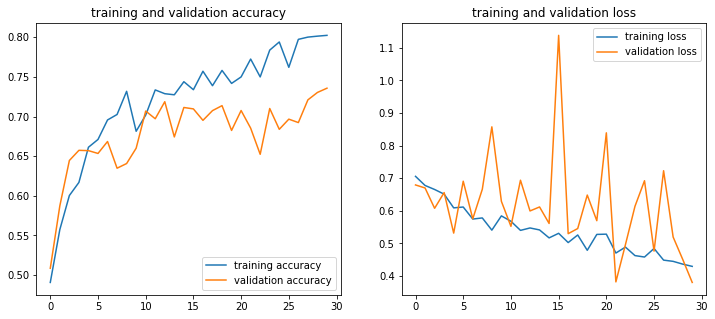

In [41]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='training loss')
plt.plot(epochs_range,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()

In [37]:
import numpy as np
from keras.preprocessing import image

In [72]:
def test_your_image(link):
    pic=cv2.imread(link)
    plt.imshow(pic)
    test_image=image.load_img(link,target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)
    training_set.class_indices
    if result[0][0]>=0.5:
        prediction='Dog'
    else:
        prediction='Cat'
    return print('The Animal in the below Image is : ',prediction)

The Animal in the below Image is :  Dog


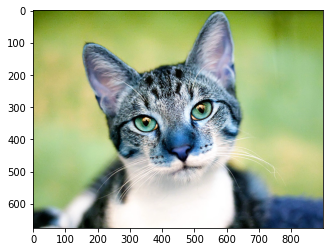

In [73]:
know_your_image = test_your_image(r'C:\Users\neeraj\Downloads\Domestic-feline-tabby-cat.jpg')

The Animal in the below Image is :  Cat


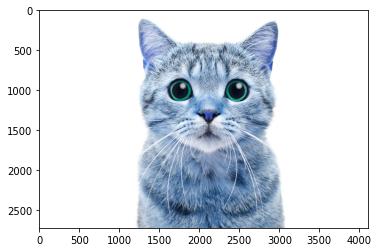

In [74]:
know_your_image = test_your_image(r'C:\Users\neeraj\Downloads\cat.jpg')

The Animal in the below Image is :  Cat


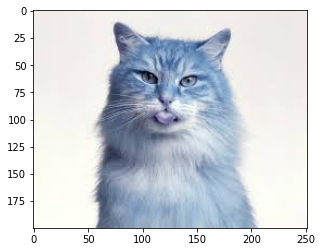

In [76]:
know_your_image = test_your_image(r'C:\Users\neeraj\Downloads\cat1.jfif')

The Animal in the below Image is :  Dog


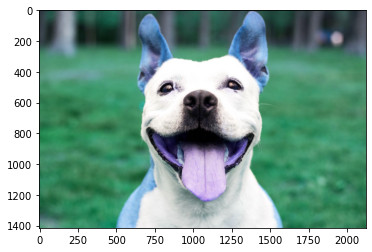

In [77]:
know_your_image = test_your_image(r'C:\Users\neeraj\Downloads\dod.jpg')

The Animal in the below Image is :  Dog


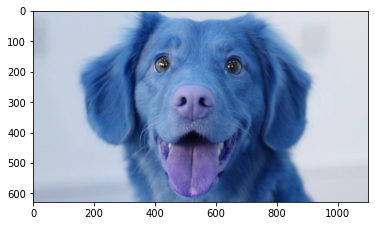

In [78]:
know_your_image = test_your_image(r'C:\Users\neeraj\Downloads\dog.jpg')